In [1]:
import matplotlib.pyplot as plt
import traceback
from random import randint
TEST = 1000

def peorCaso(n):
    l =  list(range(n,0,-1))
    return l

In [2]:
class Nodo:
    def __init__(self,t):
        self.hijos = list()
        self.llaves = list()
        self.hoja=1
        self.n=0
        for k in range (2*t) :
            self.llaves.append( [None])
        for k in range (2*t+1):
            self.hijos.append( [None])

In [3]:
class ArbolB:
    def __init__(self,gradoMinimo) -> None:
        self.t = gradoMinimo
        self.raiz = None
        self.contT = 0
        self.contE = 0

    def bTreeCreate(self):  #O(1)
        if self.raiz == None:
            self.raiz = Nodo(self.t)
        return self.raiz

    def bTreeSplitShild (self, x,i):    #O(C_Max = d)
        z=Nodo(self.t)
        y= x.hijos[i]
        z.hoja = y.hoja
        z.n=self.t-1
        for j in range (1, self.t):
            z.llaves[j]=y.llaves[j+self.t]
            y.llaves[j+self.t]=None
        if y.hoja==0:
            for j in range(1, self.t+1):
                z.hijos[j]=y.hijos[j+self.t]
                y.hijos[j+self.t]=None
        y.n=self.t-1
        for j in range (x.n+1,i,-1):
            x.hijos[j+1]=x.hijos[j]

        x.hijos[i+1]=z

        for j in range (x.n,i-1,-1):
            x.llaves[j+1]=x.llaves [j]
        x.llaves[i]=y.llaves[self.t]
        y.llaves [self.t]=None
        x.n=x.n+1

    def bTreeInsertNonFull(self,x,k):       #O(log_2d(n))
        self.contT +=1
        i=x.n
        if x.hoja == 1:     #Condición de paro
            #insertar ordenadamente
            while(i>=1) and (k<x.llaves[i]):
                x.llaves[i+1] = x.llaves[i]
                i=i-1
            x.llaves[i+1]=k
            x.n =x.n+1
        else:
            while(i>=1) and (k<x.llaves[i]):
                i=i-1
            i=i+1
            if x.hijos[i].n == 2*self.t-1:
                self.bTreeSplitShild(x,i)           #O(C_max = d)
                if k > x.llaves[i]:
                    i=i+1
            self.contE+=1
            self.bTreeInsertNonFull(x.hijos[i],k)           #Llamada recursiva


    def bTreeInsert(self,k):
        r = self.raiz
        if r.n == 2*self.t-1:
            s=Nodo(self.t)
            self.raiz = s
            s.hoja = 0
            s.n = 0
            s.hijos[1]=r
            self.bTreeSplitShild(s,1)
            self.bTreeInsertNonFull(s,k)        #O(log_2d)
        else:
            self.bTreeInsertNonFull(r,k)        #O(log_2d)


    def imprimeNodo(self,node,altura):
        if self.raiz == None:
            return

        s = "".join(["\t" for _ in range(altura)])
        for i in range(2*self.t):
            llave = node.llaves[i]
            if llave == [None] or llave==None:
                continue
            x = str(llave)
            # print(s+x)
        if node.hoja == 1:
            return
        for i in range(2*self.t+1):
            hijo = node.hijos[i]
            if hijo == [None] or hijo == None:
                continue
            self.imprimeNodo(hijo,altura+1)

### Peor caso
El peor caso de complejidad es cuando el valor que deseamos insertar dentro de nuestro árbol le corresponde un nodo hoja ya que es la forma en que mayores saltos entre nodos.
$$\mathcal{O}(\log_{2d-1}(n))$$

Text(0, 0.5, 'Iteraciones')

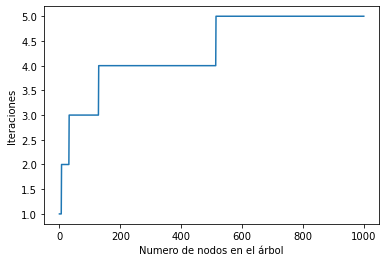

In [4]:
X = range(TEST)
pC = peorCaso(TEST)
bt = ArbolB(4)
bt.bTreeCreate()
Y = []
for valor in pC:
    bt.bTreeInsert(valor)
    Y.append(bt.contT)
    bt.contT = 0
    
plt.plot(X,Y)
plt.xlabel("Numero de nodos en el árbol")
plt.ylabel("Iteraciones")

El uso principal de los arboles b es porque su altura suele ser muy baja por la cantidad de información
ion que guarda en cada nodo es mucho mayor que en un árbol binario, esto permite que los accesos a memoria se reduzcan.
##### ¿Por que iterar sobre las llaves de de nodo se considera como de complejidad $d$ o lineal?
Lo cierto es que $d$ es un valor constante, si nuestro árbol a lo largo de tiempo aumentara el valor de este entonces habría que considerarlo pero este violaría una de la reglas que se tienen a la hora de querer implementar esta estructura.

# Complejidad Espacial
### Peor Caso
Dado que estamos ante una función recursiva existe un consumo de memoria por cada llamada pues esta se coloca en la pila de llamadas. El caso en el que la pila se ve mas saturada es cuando el valor se inserta en una hoja puesto que para ir bajando en el árbol hay que hacer una llamada para pasar al siguiente nivel.
$$\mathcal{O}(\log_{2d-1}(n))$$


Text(0, 0.5, 'Memoria')

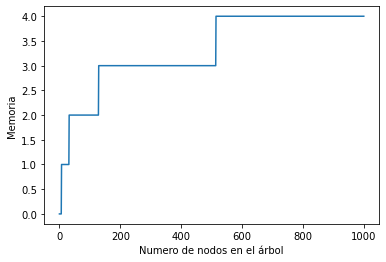

In [5]:
X = range(TEST)
pC = peorCaso(TEST)
bt = ArbolB(4)
bt.bTreeCreate()
Y = []
for valor in pC:
    bt.bTreeInsert(valor)
    Y.append(bt.contE)
    bt.contE = 0
plt.plot(X,Y)
plt.xlabel("Numero de nodos en el árbol")
plt.ylabel("Memoria")